# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [22]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


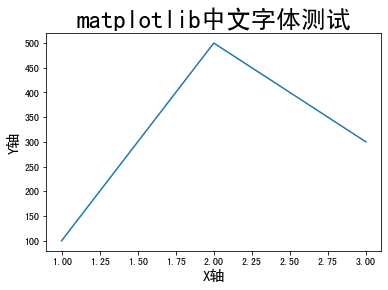

In [4]:
# plt.plot([1,2,3], [100,500,300])
# plt.title('matplotlib中文字体测试', fontsize=25)
# plt.xlabel('X轴', fontsize=15)
# plt.ylabel('Y轴', fontsize=15)
# plt.show()

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('../../mmsegmentation')

In [2]:
os.getcwd()

'/home/cine/Documents/GitHub/mmsegmentation'

## 导入工具包

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [12]:
# 日志文件路径
log_path = 'work_dirs/Watermelon87_Semantic_Seg_Mask/20230616_114954/vis_data/20230616_114954.json'

In [13]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [14]:
len(json_list)

100

In [15]:
eval(json_list[4])

{'aAcc': 82.92,
 'mIoU': 46.98,
 'mAcc': 57.11,
 'data_time': 0.00153658390045166,
 'time': 1.1312172651290893,
 'step': 400}

In [16]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.004989,0.006264,0.935120,0.640302,64.406837,0.294818,63.904823,0.139143,5606.0,100.0
1,0.004978,0.011840,0.806236,0.571924,85.030617,0.234312,88.245132,0.145095,1906.0,200.0
2,0.004967,0.010901,0.754123,0.526506,85.528564,0.227617,81.327820,0.145101,1906.0,300.0
3,0.004956,0.015348,0.610431,0.419790,83.114624,0.190641,84.140015,0.150689,1906.0,400.0
4,0.004945,0.007344,0.517224,0.356335,89.707436,0.160888,89.964798,0.141802,9087.0,500.0
...,...,...,...,...,...,...,...,...,...,...
75,0.004154,0.007140,0.313958,0.212495,88.143921,0.101463,88.112381,0.152288,1906.0,7600.0
76,0.004142,0.006925,0.261283,0.178677,93.179825,0.082606,91.906227,0.149308,1906.0,7700.0
77,0.004131,0.006397,0.223689,0.152625,96.606949,0.071064,96.599319,0.142561,1906.0,7800.0
78,0.004120,0.006047,0.317054,0.216208,87.273148,0.100846,88.120010,0.142562,1906.0,7900.0


In [17]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,82.92,46.98,57.11,0.001537,1.131217,400.0
1,84.80,49.33,55.63,0.001796,0.254066,800.0
2,92.37,62.66,67.45,0.001617,0.255049,1200.0
3,91.04,60.11,66.68,0.001728,0.253393,1600.0
4,95.43,66.45,70.84,0.001796,0.252314,2000.0
5,93.93,64.51,70.16,0.001536,0.253147,2400.0
6,96.29,74.25,78.78,0.001608,0.257163,2800.0
7,93.71,73.02,80.27,0.001624,0.258845,3200.0
8,92.52,73.40,82.27,0.001595,0.253323,3600.0
9,89.25,67.13,78.20,0.001773,0.272619,4000.0


## 导出训练日志表格

In [18]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [19]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [20]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

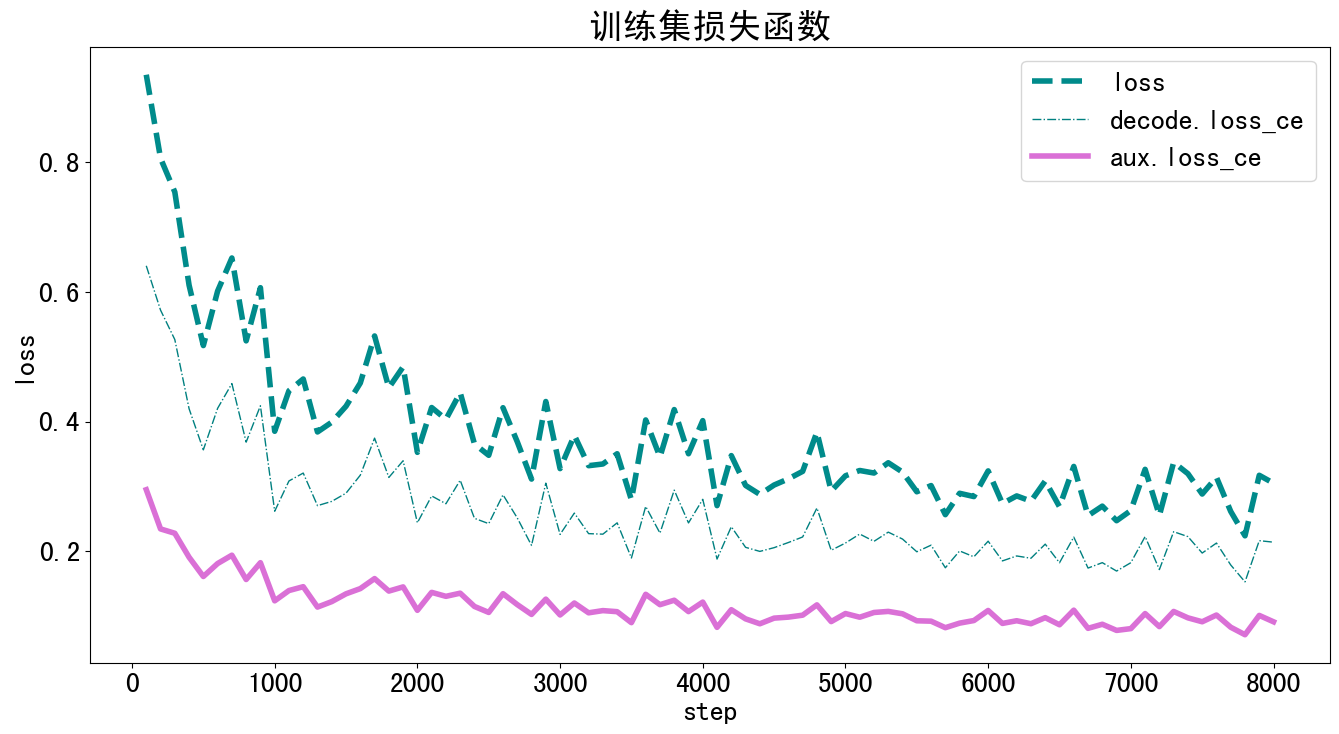

In [23]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [24]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [25]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

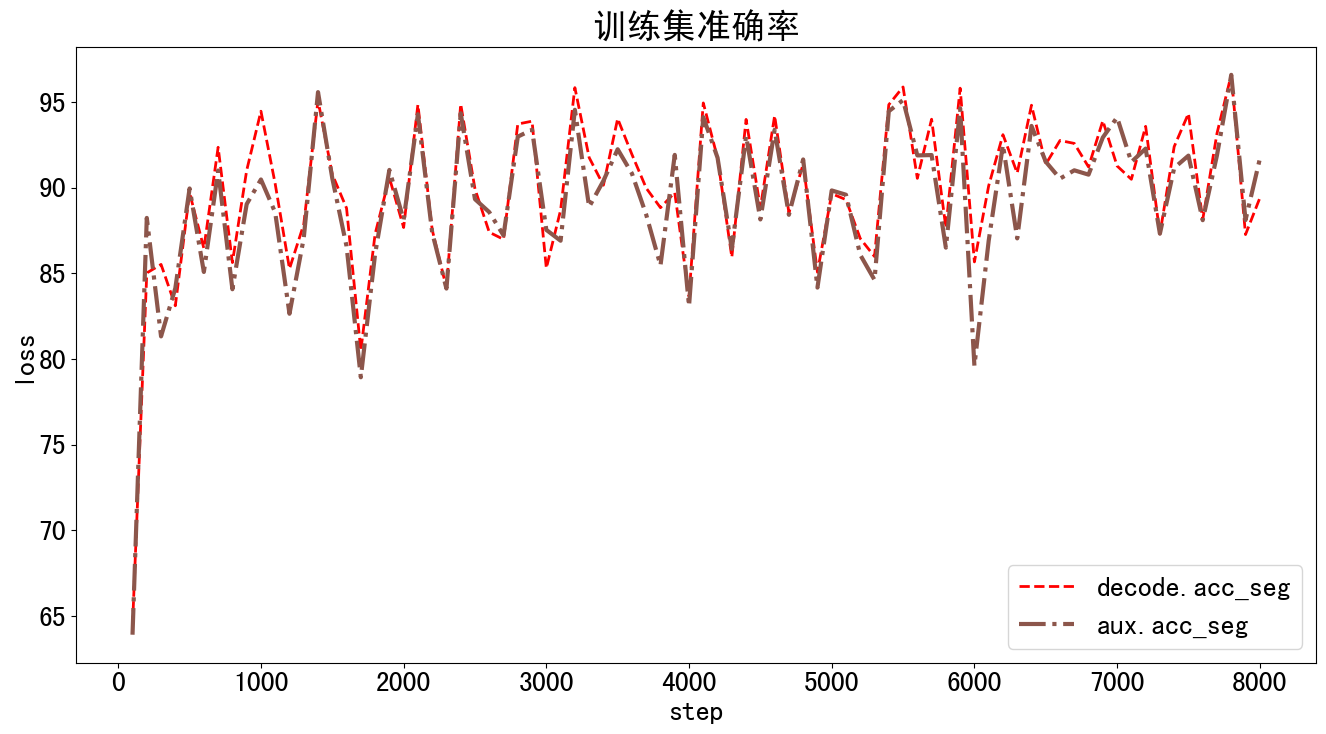

In [26]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [27]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [28]:
metrics = ['aAcc', 'mIoU', 'mAcc']

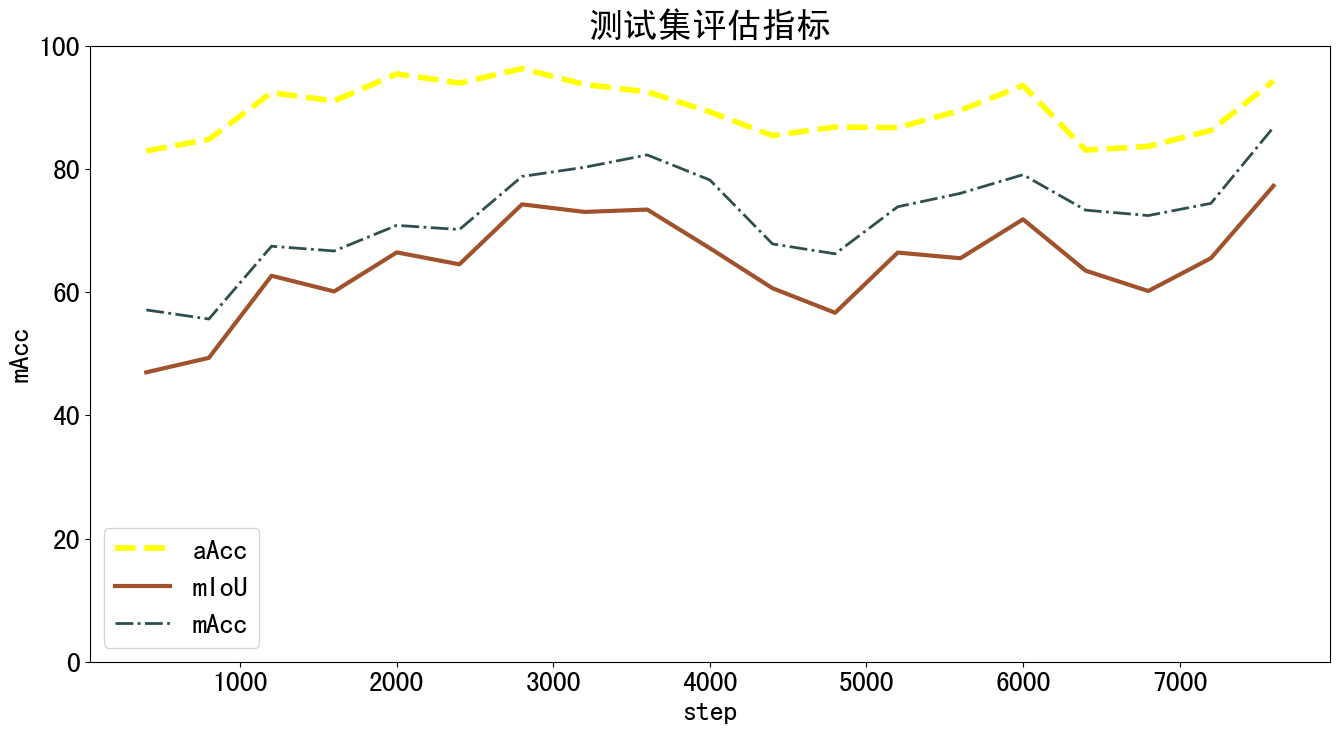

In [29]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()